In [42]:
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#imports for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector, TimeDistributed

In [43]:
sub1_train = scipy.io.loadmat('sub1_comp.mat')
sub1_test = scipy.io.loadmat('sub1_testlabels.mat')
sub2_train = scipy.io.loadmat('sub2_comp.mat')
sub2_test = scipy.io.loadmat('sub2_testlabels.mat')
sub3_train = scipy.io.loadmat('sub3_comp.mat')
sub3_test = scipy.io.loadmat('sub3_testlabels.mat')

In [44]:
sub1_x_train=pd.DataFrame(sub1_train['train_data'])
sub1_y_train=pd.DataFrame(sub1_train['train_dg'])
sub1_x_test=pd.DataFrame(sub1_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub2_x_train=pd.DataFrame(sub2_train['train_data'])
sub2_y_train=pd.DataFrame(sub2_train['train_dg'])
sub2_x_test=pd.DataFrame(sub2_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub3_x_train=pd.DataFrame(sub3_train['train_data'])
sub3_y_train=pd.DataFrame(sub3_train['train_dg'])
sub3_x_test=pd.DataFrame(sub3_train['test_data'])
sub3_y_test=pd.DataFrame(sub3_test['test_dg'])

In [24]:
sub1_x_train

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,193,-491,-4293,2659,918,3700,-1166,111,-376,245,...,-2587,1310,-4677,38,-4787,-2258,-1782,1827,3096,2395
1,96,-451,-4419,2682,614,3581,-864,284,-344,387,...,-2805,1295,-4681,-34,-4696,-2090,-1746,1794,3120,2497
2,329,-272,-4380,2862,513,3540,-523,501,-148,622,...,-2871,1357,-4537,40,-4357,-1791,-1578,1668,3236,2569
3,713,-3,-4141,3033,830,3436,-210,609,1,793,...,-2930,1424,-4354,171,-3888,-1473,-1415,1373,3344,2546
4,968,207,-3748,3120,1249,3235,-7,601,53,888,...,-3037,1377,-4171,307,-3445,-1220,-1345,975,3383,2425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,778,-452,1137,-353,-1442,2834,-1259,-2186,631,404,...,2536,1125,330,1070,1540,765,-436,3531,3068,670
399996,1111,-390,1325,-137,-861,2809,-863,-1822,713,534,...,2672,1326,365,1340,1741,1157,-186,3680,3161,1347
399997,1047,-588,1257,-238,-599,2679,-793,-1638,464,344,...,2517,1292,133,1308,1669,1255,-261,3559,2951,1856
399998,841,-834,962,-433,-681,2650,-924,-1555,134,-22,...,2273,1093,-172,1103,1488,1202,-458,3342,2703,2135


In [5]:

sub1_y_train.head(400000)

,0,1,2,3,4
0,-0.400113,0.173276,0.999565,-0.061843,0.41964
1,-0.400113,0.173276,0.999565,-0.061843,0.41964
2,-0.400113,0.173276,0.999565,-0.061843,0.41964
3,-0.400113,0.173276,0.999565,-0.061843,0.41964
4,-0.400113,0.173276,0.999565,-0.061843,0.41964
...,...,...,...,...,...
399995,-0.612512,-0.347929,-0.217419,-0.175609,-0.07192
399996,-0.612512,-0.347929,-0.217419,-0.175609,-0.07192
399997,-0.612512,-0.347929,-0.217419,-0.175609,-0.07192
399998,-0.612512,-0.347929,-0.217419,-0.175609,-0.07192


In [45]:
# Define systematic sampling function
def systematic_sampling(df, step):
 
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
 
 
# Obtain a systematic sample and save it in a new variable
sample_sub1xtrain = systematic_sampling(sub1_x_train, 10)
sample_sub1ytrain = systematic_sampling(sub1_y_train, 10)

sample_sub2xtrain = systematic_sampling(sub2_x_train, 10)
sample_sub2ytrain = systematic_sampling(sub2_y_train, 10)

sample_sub3xtrain = systematic_sampling(sub3_x_train, 10)
sample_sub3ytrain = systematic_sampling(sub3_y_train, 10)




In [37]:
sample_sub1xtrain

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,193,-491,-4293,2659,918,3700,-1166,111,-376,245,...,-2587,1310,-4677,38,-4787,-2258,-1782,1827,3096,2395
10,734,1009,-1963,3874,568,2652,1057,-100,739,1433,...,-2752,1637,-2815,1023,-1301,-833,-340,643,3769,2106
20,-2346,1012,-1170,3862,87,2351,3179,-1153,-87,1104,...,-2087,227,1011,1161,-328,-1625,65,-1106,1129,280
30,-213,3598,-1068,4292,1720,3745,5056,-1039,1923,2199,...,817,1147,2540,974,-144,-2392,1219,594,3089,858
40,902,5872,-762,4967,2892,2143,6468,832,3150,2568,...,3904,2114,4280,1469,-600,-681,2378,2451,3271,1894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399950,-1918,-768,-473,-353,-776,2541,-1412,-1186,-409,615,...,984,-1882,1133,2091,3173,1430,-1867,1270,2712,691
399960,-2866,-1746,450,-830,-1554,3465,-2174,-1842,-1709,677,...,1030,-1247,1333,1790,3090,1164,-1747,855,2260,1719
399970,-625,658,1893,566,800,4928,113,-1306,196,1922,...,2835,725,2050,2452,1147,2452,756,2728,3046,3434
399980,-808,-1017,-251,-615,-1357,2325,-2602,-3175,-1528,-1082,...,952,-580,157,-992,-3012,-861,-1477,2465,-146,-499


In [46]:
#apply standardization to the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(sample_sub1xtrain)
sample_sub1xtrain_std = scaler.transform(sample_sub1xtrain)

scaler.fit(sample_sub1ytrain)
sample_sub1ytrain_std = scaler.transform(sample_sub1ytrain)

scaler.fit(sample_sub2xtrain)
sample_sub2xtrain_std = scaler.transform(sample_sub2xtrain)

scaler.fit(sample_sub2ytrain)
sample_sub2ytrain_std = scaler.transform(sample_sub2ytrain)

scaler.fit(sample_sub3xtrain)
sample_sub3xtrain_std = scaler.transform(sample_sub3xtrain)

scaler.fit(sample_sub3ytrain)
sample_sub3ytrain_std = scaler.transform(sample_sub3ytrain)



In [36]:
sample_sub1xtrain.shape

(40000, 62)

In [10]:
sample_sub1ytrain.shape

(40000, 5)

In [47]:

sample_sub1xtrain_std = sample_sub1xtrain_std.reshape(40000,62)
sample_sub1ytrain_std = sample_sub1ytrain_std.reshape(40000,5)

sample_sub2xtrain_std = sample_sub2xtrain_std.reshape(40000,48)
sample_sub2ytrain_std = sample_sub2ytrain_std.reshape(40000,5)

sample_sub3xtrain_std = sample_sub3xtrain_std.reshape(40000,64)
sample_sub3ytrain_std = sample_sub3ytrain_std.reshape(40000,5)



In [48]:
#convert to dataframe
sample_sub1xtrain_std_df = pd.DataFrame(sample_sub1xtrain_std)
sample_sub1ytrain_std_df = pd.DataFrame(sample_sub1ytrain_std)

sample_sub2xtrain_std_df = pd.DataFrame(sample_sub2xtrain_std)
sample_sub2ytrain_std_df = pd.DataFrame(sample_sub2ytrain_std)

sample_sub3xtrain_std_df = pd.DataFrame(sample_sub3xtrain_std)
sample_sub3ytrain_std_df = pd.DataFrame(sample_sub3ytrain_std)

In [25]:
sample_sub1xtrain_std_df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.090627,-0.130405,-2.008480,0.750110,0.334242,1.431986,-0.374401,0.058205,-0.108002,0.080105,...,-1.077530,0.411161,-0.184355,0.011787,-2.352970,-1.013565,-0.594151,0.768750,1.111656,0.954004
1,0.341756,0.266342,-0.917319,1.093093,0.206912,1.026294,0.338957,-0.050479,0.211091,0.466279,...,-1.146296,0.513921,-0.111115,0.321599,-0.639187,-0.373009,-0.114051,0.270340,1.353135,0.838955
2,-1.087960,0.267135,-0.545949,1.089705,0.031924,0.909774,1.019904,-0.592869,-0.025295,0.359334,...,-0.869146,0.070828,0.039378,0.365004,-0.160842,-0.729023,0.020790,-0.465909,0.405879,0.112038
3,-0.097835,0.951127,-0.498181,1.211090,0.626010,1.449406,1.622231,-0.534148,0.549930,0.715277,...,0.341146,0.359939,0.099520,0.306187,-0.070384,-1.073800,0.405003,0.249713,1.109144,0.342136
4,0.419741,1.552595,-0.354879,1.401636,1.052383,0.829255,2.075340,0.429585,0.901075,0.835225,...,1.627707,0.663819,0.167962,0.461880,-0.294563,-0.304683,0.790881,1.031425,1.174448,0.754560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-0.889285,-0.203671,-0.219537,-0.100148,-0.282035,0.983325,-0.453342,-0.609866,-0.117446,0.200378,...,0.410746,-0.591926,0.044177,0.657518,1.560315,0.644239,-0.622451,0.534278,0.973873,0.275654
39996,-1.329341,-0.462350,0.212713,-0.234801,-0.565072,1.341015,-0.697867,-0.947765,-0.489482,0.220532,...,0.429918,-0.392377,0.052044,0.562844,1.519511,0.524669,-0.582498,0.359582,0.811692,0.684894
39997,-0.289083,0.173503,0.888484,0.159276,0.291314,1.907358,0.036028,-0.671677,0.055694,0.625235,...,1.182182,0.227325,0.080246,0.771063,0.564295,1.103642,0.250851,1.148030,1.093716,1.367622
39998,-0.374030,-0.269531,-0.115572,-0.174108,-0.493403,0.899709,-0.835212,-1.634380,-0.437683,-0.351253,...,0.397410,-0.182772,0.005787,-0.312180,-1.480347,-0.385595,-0.492604,1.037319,-0.051603,-0.198076


In [40]:
sample_sub1xtrain

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,193,-491,-4293,2659,918,3700,-1166,111,-376,245,...,-2587,1310,-4677,38,-4787,-2258,-1782,1827,3096,2395
10,734,1009,-1963,3874,568,2652,1057,-100,739,1433,...,-2752,1637,-2815,1023,-1301,-833,-340,643,3769,2106
20,-2346,1012,-1170,3862,87,2351,3179,-1153,-87,1104,...,-2087,227,1011,1161,-328,-1625,65,-1106,1129,280
30,-213,3598,-1068,4292,1720,3745,5056,-1039,1923,2199,...,817,1147,2540,974,-144,-2392,1219,594,3089,858
40,902,5872,-762,4967,2892,2143,6468,832,3150,2568,...,3904,2114,4280,1469,-600,-681,2378,2451,3271,1894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399950,-1918,-768,-473,-353,-776,2541,-1412,-1186,-409,615,...,984,-1882,1133,2091,3173,1430,-1867,1270,2712,691
399960,-2866,-1746,450,-830,-1554,3465,-2174,-1842,-1709,677,...,1030,-1247,1333,1790,3090,1164,-1747,855,2260,1719
399970,-625,658,1893,566,800,4928,113,-1306,196,1922,...,2835,725,2050,2452,1147,2452,756,2728,3046,3434
399980,-808,-1017,-251,-615,-1357,2325,-2602,-3175,-1528,-1082,...,952,-580,157,-992,-3012,-861,-1477,2465,-146,-499


<Axes: >

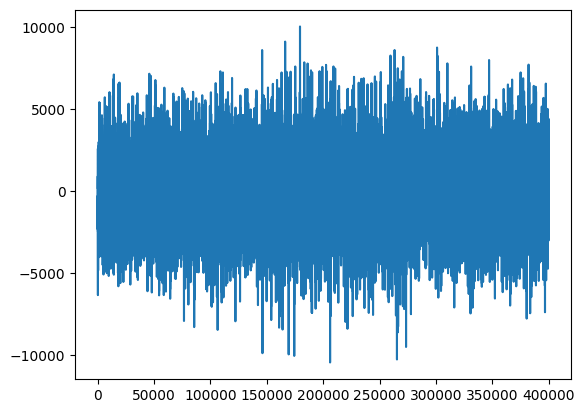

In [39]:
sample_sub1xtrain[0].plot()

<Axes: >

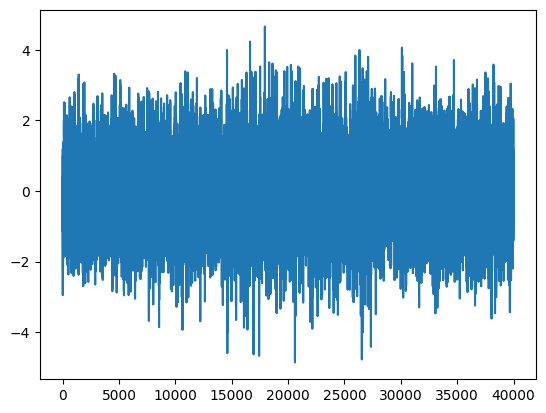

In [34]:
sample_sub1xtrain_std_df[0].plot()

<Axes: >

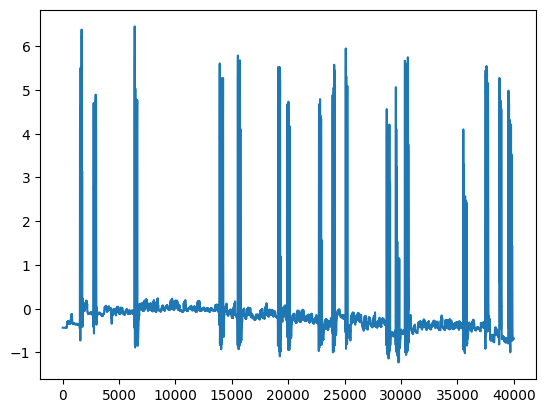

In [32]:
sample_sub1ytrain_std_df[0].plot()

In [13]:
trainX=[]  
trainY=[]

n_future = 1
n_past = 10

for i in range(n_past, len(sample_sub1xtrain_std_df) - n_future +1):
    trainX.append(sample_sub1xtrain_std_df.iloc[i - n_past:i, 0:62].to_numpy())
    trainY.append(sample_sub1xtrain_std_df.iloc[i + n_future - 1:i + n_future, 0].to_numpy())

trainX, trainY = np.array(trainX), np.array(trainY)

trainX.shape
trainY.shape

(39990, 1)

In [14]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (39990, 10, 62).
trainY shape == (39990, 1).


In [15]:
#define autoencoder model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            32512     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 44,961
Trainable params: 44,961
Non-trainable params: 0
_________________________________________________________________


In [41]:
#fit model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
2250/2250 [==============================] - 27s 12ms/step - loss: 0.1446 - accuracy: 0.0000e+00 - val_loss: 0.9854 - val_accuracy: 0.0000e+00
Epoch 2/5
2250/2250 [==============================] - 26s 11ms/step - loss: 0.1445 - accuracy: 0.0000e+00 - val_loss: 0.9827 - val_accuracy: 0.0000e+00
Epoch 3/5
2250/2250 [==============================] - 26s 12ms/step - loss: 0.1429 - accuracy: 0.0000e+00 - val_loss: 0.9812 - val_accuracy: 0.0000e+00
Epoch 4/5
2250/2250 [==============================] - 26s 11ms/step - loss: 0.1432 - accuracy: 0.0000e+00 - val_loss: 0.9818 - val_accuracy: 0.0000e+00
Epoch 5/5
2250/2250 [==============================] - 27s 12ms/step - loss: 0.1429 - accuracy: 0.0000e+00 - val_loss: 0.9891 - val_accuracy: 0.0000e+00


LEARNING RATE SCHEDULER

In [21]:
#exponential decay learning rate
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [22]:
lr=0.01
for i in range(50):
    lr = scheduler(i, lr)
    print("Epoch {}: learning rate = {}".format(i, lr))

Epoch 0: learning rate = 0.01
Epoch 1: learning rate = 0.01
Epoch 2: learning rate = 0.01
Epoch 3: learning rate = 0.01
Epoch 4: learning rate = 0.01
Epoch 5: learning rate = 0.01
Epoch 6: learning rate = 0.01
Epoch 7: learning rate = 0.01
Epoch 8: learning rate = 0.01
Epoch 9: learning rate = 0.01
Epoch 10: learning rate = 0.009048374369740486
Epoch 11: learning rate = 0.008187307976186275
Epoch 12: learning rate = 0.007408182602375746
Epoch 13: learning rate = 0.006703200750052929
Epoch 14: learning rate = 0.006065306719392538
Epoch 15: learning rate = 0.005488116759806871
Epoch 16: learning rate = 0.004965853411704302
Epoch 17: learning rate = 0.004493290092796087
Epoch 18: learning rate = 0.004065697081387043
Epoch 19: learning rate = 0.003678794950246811
Epoch 20: learning rate = 0.00332871126011014
Epoch 21: learning rate = 0.00301194260828197
Epoch 22: learning rate = 0.002725318307057023
Epoch 23: learning rate = 0.002465970115736127
Epoch 24: learning rate = 0.0022313019726425

In [23]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
#train the model
model.fit(trainX, trainY, epochs=50, batch_size=16, validation_split=0.1, verbose=1, callbacks=[callback])

Epoch 1/50
2250/2250 [==============================] - 27s 12ms/step - loss: 0.4649 - accuracy: 0.0000e+00 - val_loss: 0.5788 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/50
2250/2250 [==============================] - 27s 12ms/step - loss: 0.4456 - accuracy: 0.0000e+00 - val_loss: 0.6096 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/50
2250/2250 [==============================] - 22s 10ms/step - loss: 0.4322 - accuracy: 0.0000e+00 - val_loss: 0.6155 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/50
2250/2250 [==============================] - 23s 10ms/step - loss: 0.4138 - accuracy: 0.0000e+00 - val_loss: 0.6229 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/50
2250/2250 [==============================] - 25s 11ms/step - loss: 0.4031 - accuracy: 0.0000e+00 - val_loss: 0.6302 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/50
2250/2250 [==============================] - 28s 12ms/step - loss: 0.3869 - accuracy: 0.0000e+00 - val_loss: 0.6357 - val_accuracy: 0.0000e+00 - lr: 0.001

KeyboardInterrupt: 

In [78]:
def create_sequences(X,y, time_steps=10):
    X_out, y_out = [], []
    for i in range(len(X) - time_steps):
        X_out.append(X.iloc[i:(i + time_steps)].values)
        y_out.append(y.iloc[i + time_steps])
    return np.array(X_out), np.array(y_out)

In [95]:
sample_sub1xtrain_std_df[0].shape

(40000,)

In [137]:

X_train, y_train = create_sequences(sample_sub1xtrain[[0]], sample_sub1xtrain[0])
X_test, y_test = create_sequences(sub1_x_test[[0]], sub1_x_test[0])
X_train.shape
X_test.shape

(199990, 10, 1)

In [138]:
X_train[0]

array([[  193],
       [  734],
       [-2346],
       [ -213],
       [  902],
       [ -279],
       [-2566],
       [-1657],
       [-1413],
       [-3537]])

In [139]:
# set seed to regenerate same sequence of random numbers. 
np.random.seed(7)
tf.random.set_seed(7)

In [140]:
model=Sequential()
model.add(LSTM(128, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 repeat_vector_7 (RepeatVect  (None, 10, 128)          0         
 or)                                                             
                                                                 
 lstm_17 (LSTM)              (None, 10, 128)           131584    
                                                                 
 dropout_16 (Dropout)        (None, 10, 128)           0         
                                                                 
 time_distributed_6 (TimeDis  (None, 10, 1)            129       
 tributed)                                            

In [118]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                    shuffle=False)

Epoch 1/10
2000/2000 [==============================] - 43s 22ms/step - loss: 0.8294 - val_loss: 0.9468
Epoch 2/10
2000/2000 [==============================] - 37s 18ms/step - loss: 0.8255 - val_loss: 0.9489
Epoch 3/10
2000/2000 [==============================] - 39s 19ms/step - loss: 0.8251 - val_loss: 0.9477
Epoch 4/10
2000/2000 [==============================] - 39s 19ms/step - loss: 0.8244 - val_loss: 0.9472
Epoch 5/10
2000/2000 [==============================] - 38s 19ms/step - loss: 0.8240 - val_loss: 0.9484
Epoch 6/10
2000/2000 [==============================] - 38s 19ms/step - loss: 0.8236 - val_loss: 0.9483


In [119]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                    shuffle=False)

Epoch 1/10
1000/1000 [==============================] - 28s 28ms/step - loss: 0.9070 - val_loss: 0.8522
Epoch 2/10
1000/1000 [==============================] - 30s 30ms/step - loss: 0.9070 - val_loss: 0.8540
Epoch 3/10
1000/1000 [==============================] - 29s 29ms/step - loss: 0.9071 - val_loss: 0.8545
Epoch 4/10
1000/1000 [==============================] - 27s 27ms/step - loss: 0.9073 - val_loss: 0.8546
Epoch 5/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.9073 - val_loss: 0.8550
Epoch 6/10
1000/1000 [==============================] - 31s 31ms/step - loss: 0.9070 - val_loss: 0.8535


In [120]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                    shuffle=False)

Epoch 1/10
500/500 [==============================] - 24s 48ms/step - loss: 0.9714 - val_loss: 0.9332
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 0.9711 - val_loss: 0.9332
Epoch 3/10
500/500 [==============================] - 16s 33ms/step - loss: 0.9712 - val_loss: 0.9333
Epoch 4/10
500/500 [==============================] - 17s 34ms/step - loss: 0.9713 - val_loss: 0.9333
Epoch 5/10
500/500 [==============================] - 17s 34ms/step - loss: 0.9713 - val_loss: 0.9333
Epoch 6/10
500/500 [==============================] - 19s 38ms/step - loss: 0.9713 - val_loss: 0.9333


In [141]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=8,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                    shuffle=False)

Epoch 1/10
3999/3999 [==============================] - 126s 29ms/step - loss: 4451126.5000 - val_loss: 4166944.0000
Epoch 2/10
3999/3999 [==============================] - 117s 29ms/step - loss: 4219043.0000 - val_loss: 3998338.0000
Epoch 3/10
3999/3999 [==============================] - 99s 25ms/step - loss: 4116368.7500 - val_loss: 3894754.7500
Epoch 4/10
3999/3999 [==============================] - 104s 26ms/step - loss: 4043730.2500 - val_loss: 3885273.5000
Epoch 5/10
3999/3999 [==============================] - 111s 28ms/step - loss: 4031043.0000 - val_loss: 3809960.0000
Epoch 6/10
3999/3999 [==============================] - 99s 25ms/step - loss: 4047671.7500 - val_loss: 3797106.7500
Epoch 7/10
3999/3999 [==============================] - 101s 25ms/step - loss: 3956938.7500 - val_loss: 3720024.2500
Epoch 8/10
3999/3999 [==============================] - 95s 24ms/step - loss: 3908481.7500 - val_loss: 3646722.2500
Epoch 9/10
3999/3999 [==============================] - 97s 24ms/st

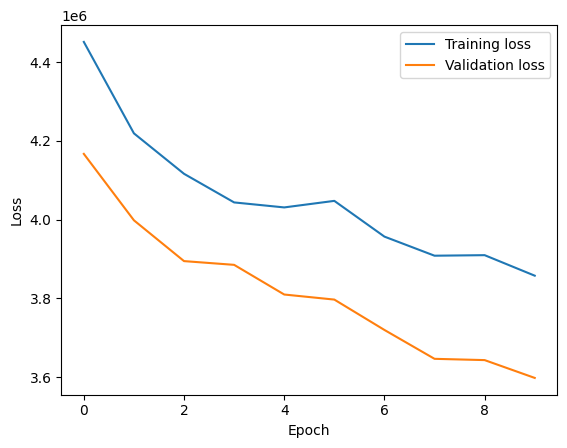

In [142]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();


1250/1250 [==============================] - 19s 13ms/step
Reconstruction error threshold: 6190.993682861328


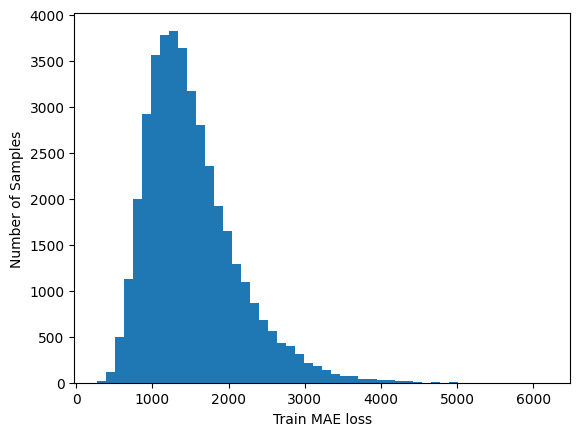

In [143]:
# Mean Absolute Error loss
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

# Set reconstruction error threshold
threshold = np.max(train_mae_loss)

print('Reconstruction error threshold:',threshold)

6250/6250 [==============================] - 50s 8ms/step


Text(0, 0.5, 'Number of samples')

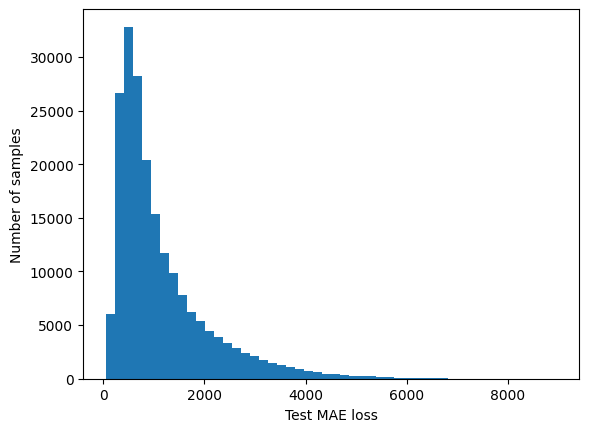

In [144]:
X_test_pred = model.predict(X_test, verbose=1)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

In [149]:
anomaly_df = pd.DataFrame(sample_sub1xtrain[10:])
anomaly_df['loss'] = test_mae_loss
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']

ValueError: Length of values (199990) does not match length of index (39990)

In [151]:
#check if anomaly = true
anomaly_df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
100,1224,1177,-1334,-3035,-421,1094,-1101,360,-3192,-3689,...,-664,-3861,608,1451,354,-1612,-5931,503,1033,2198
110,2583,-406,-2039,-2364,-1113,251,-3205,1018,-2352,-1027,...,-1283,-2688,-993,-183,1564,-1974,-5467,1142,1209,2020
120,-531,-1021,-3029,-2454,-877,-320,-6188,-877,-1454,-1274,...,-3032,-2016,-2332,-847,491,-2274,-4636,137,-863,-601
130,-6358,-235,-3588,-1487,63,-303,-7133,-3476,-1126,-2357,...,-3388,-788,-1918,-1228,450,-1794,-2373,-746,-2351,-541
140,-1382,201,-1487,-276,-1326,951,-5223,-3767,-1571,-1987,...,-2018,-18,-1194,49,1193,-1573,-1057,-1087,-204,-1185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399950,-1918,-768,-473,-353,-776,2541,-1412,-1186,-409,615,...,984,-1882,1133,2091,3173,1430,-1867,1270,2712,691
399960,-2866,-1746,450,-830,-1554,3465,-2174,-1842,-1709,677,...,1030,-1247,1333,1790,3090,1164,-1747,855,2260,1719
399970,-625,658,1893,566,800,4928,113,-1306,196,1922,...,2835,725,2050,2452,1147,2452,756,2728,3046,3434
399980,-808,-1017,-251,-615,-1357,2325,-2602,-3175,-1528,-1082,...,952,-580,157,-992,-3012,-861,-1477,2465,-146,-499
